<a href="https://colab.research.google.com/github/oMangoo/hackathon24/blob/main/olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [12]:
from google.colab import files
import pandas as pd
import io
import plotly.express as px

uploaded = files.upload()

Saving Tokyo 2021 dataset v4.csv to Tokyo 2021 dataset v4 (1).csv


In [11]:

df = pd.read_csv(io.BytesIO(uploaded['Tokyo 2021 dataset v4.csv']))
df = df.replace(',', '')
display(df)


,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia
...,...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA,Africa
89,86,Grenada,0,0,1,1,77,GRN,North America
90,86,Kuwait,0,0,1,1,77,KUW,Africa
91,86,Republic of Moldova,0,0,1,1,77,MDA,Asia


In [14]:
df=df[(df['Gold Medal'] >= 10)] #gives us the countries that have at least 10 or more gold medals

In [222]:
fig = px.histogram(df, x='Gold Medal', y='Team/NOC', title='Gold Medals')
fig.show()

In [9]:
df.describe()

,Rank,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [161]:
df.shape

(10, 9)

#Model Building

##Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [185]:
train = df.drop(['Rank', 'Gold Medal', 'Team/NOC','NOCCode','Continent','Total','Rank by Total'], axis = 1)
test = df['Gold Medal'] #what im predicting

In [186]:
#training
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=18) #test size = training set gets 7 samples, testing set gets 3 samples
#builds models
regr = LinearRegression()
regr.fit(X_train, y_train)

#testing, makes prediction
train_pred = regr.predict(X_train)
test_pred = regr.predict(X_test)

In [187]:
regr.score(X_test, y_test) #accuracy

0.8900583099799301

In [188]:
from sklearn.metrics import mean_squared_error, r2_score

train_pred_mean = mean_squared_error(y_train, train_pred)
train_pred_r2 = r2_score(y_train, train_pred)

test_pred_mean = mean_squared_error(y_test, test_pred)
test_pred_r2 = r2_score(y_test, test_pred)

In [189]:
print('(Train) Linear Regression Mean Squared Error: ', train_pred_mean)
print('(Train) Linear Regression R2: ', train_pred_r2)
print('(Test) Linear Regression Mean Squared Error: ', test_pred_mean)
print('(Test) Linear Regression R2: ', test_pred_r2)

(Train) Linear Regression Mean Squared Error:  41.3870592278234
(Train) Linear Regression R2:  0.5036794169937966
(Test) Linear Regression Mean Squared Error:  20.546880290417512
(Test) Linear Regression R2:  0.8900583099799301


In [190]:
lr_results = pd.DataFrame(['Linear regression', train_pred_mean, train_pred_r2, test_pred_mean, test_pred_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [191]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,41.387059,0.503679,20.54688,0.890058


##Random Forest

In [197]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [201]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

y_rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
y_rf_train_r2 = r2_score(y_train, y_rf_train_pred)

y_rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
y_rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [207]:
rf_results = pd.DataFrame(['Random forest', y_rf_train_mse, y_rf_train_r2, y_rf_test_mse, y_rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,17.143774,0.794409,30.504374,0.836778


##Model Comparison

In [224]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,41.387059,0.503679,20.54688,0.890058
0,Random forest,17.143774,0.794409,30.504374,0.836778


In [223]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,41.387059,0.503679,20.54688,0.890058
1,Random forest,17.143774,0.794409,30.504374,0.836778


#Data Visualization (Predictions)

Text(0.5, 0, 'Experimental Logs')

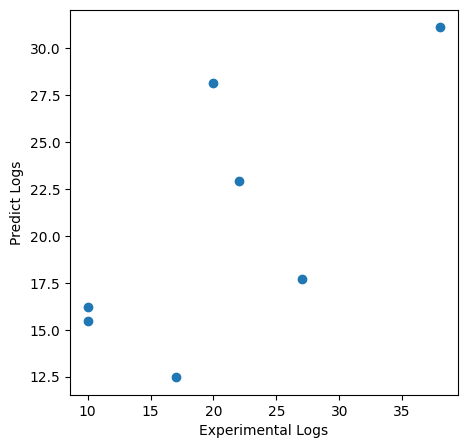

In [220]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=train_pred) #alpha = means ou change the transpaency of dots, c = #color

z = np.polyfit(y_train, train_pred, 1)
p = np.poly1d(z)

plt.plot()
plt.ylabel('Predict Logs')
plt.xlabel('Experimental Logs')